<a href="https://colab.research.google.com/github/musman2012/imaging-research/blob/master/OpenCV/WorkingwithOCTImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mat4py
import matplotlib.pyplot as plt
import numpy as np
import h5py
from mat4py import loadmat

#data = loadmat('/content/2macula.mat')


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import matplotlib.image as mpimg

#matfile = io.loadmat('/content/2macula.mat')


In [ ]:
import cv2 as cv

def detect_edges(img):    ## detecting edges
  sobelx = cv.Sobel(img,cv.CV_32F,1,0,ksize=3)
  sobely = cv.Sobel(img,cv.CV_32F,0,1,ksize=3)
  gradmag = np.sqrt(sobelx ** 2 + sobely ** 2)
  return gradmag

def return_binary(img):
  #kernel = np.ones((9, 9), np.uint8)
  #gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
  kernel1 = np.ones((5, 5), np.uint8)
  #dilation = cv.erode(gradient, kernel1, iterations=2)
  dilation = cv.erode(img, kernel1, iterations=1)
  #final = gradient-dilation
  edges = cv.Canny(dilation, 60, 60)
  #cv.imwrite("edges.png",edges)
  ret, binary = cv.threshold(edges, 15, 255, cv.THRESH_BINARY)
  return (ret, binary)

In [ ]:
normal_img_path = '/content/drive/My Drive/Colab Notebooks/AMD/Data/DH000.tif'
abnormal_img_path = '/content/drive/My Drive/Colab Notebooks/AMD/Data/DH014.tif'
FILTER_INTENSITY = 25
img = cv.imread(normal_img_path)
oneimage = cv.fastNlMeansDenoisingColored(img, None, FILTER_INTENSITY,10,7,21)
grad1 = detect_edges(img)
#print(grad1)
grad_denoise = detect_edges(oneimage)
cv.imwrite("magnitude_dn.png", grad_denoise)
cv.imwrite("magnitude.png", grad1)


True

In [ ]:
#plt.figure()
#plt.imshow(img)

In [ ]:
(ret1, binary1) = return_binary(img)
(ret_dn, binary_dn) = return_binary(oneimage)
cv.imwrite("binary.png",binary1)
cv.imwrite("binary_dn.png",binary_dn)

True

In [ ]:
img_an = cv.imread(abnormal_img_path)
oneimage_an = cv.fastNlMeansDenoisingColored(img_an,None, FILTER_INTENSITY,10,7,21)
grad1_an = detect_edges(img_an)
grad_denoise_an = detect_edges(oneimage_an)
cv.imwrite("magnitude_dn_an.png", grad_denoise_an)
cv.imwrite("magnitude_an.png", grad1_an)

True

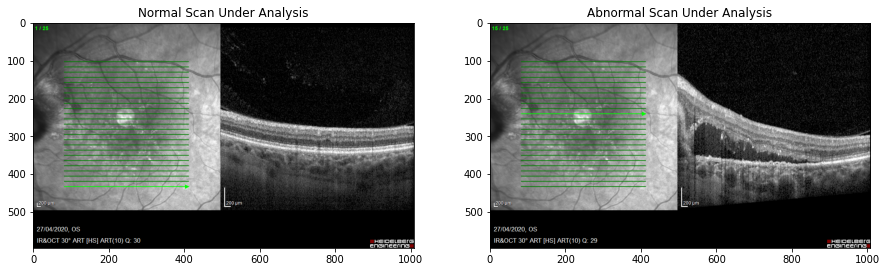

In [ ]:
fig = plt.figure(figsize=(15, 15))

normal_img = mpimg.imread(normal_img_path)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(normal_img)

abnormal_img = mpimg.imread(abnormal_img_path)
ax0 = fig.add_subplot(1, 2, 2)
plt.imshow(abnormal_img)

ax.title.set_text('Normal Scan Under Analysis')
ax0.title.set_text('Abnormal Scan Under Analysis')

plt.show()

## Difference of Normal and Anabnormal Scan

In [ ]:
def scan_diff(img1, img2):
  diff = cv.absdiff(img, img2)
  mask = cv.cvtColor(diff, cv.COLOR_BGR2GRAY)

  th = 1
  imask =  mask>th

  canvas = np.zeros_like(img2, np.uint8)
  canvas[imask] = img2[imask]
  return canvas

  #cv.imwrite("result.png", canvas)

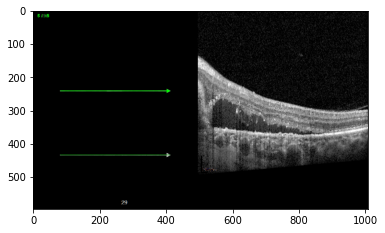

In [ ]:
plt.figure()
#res_img = mpimg.imread("/content/result.png")
plt.imshow(scan_diff(img, img_an))

## Opening and Closing Transformation

<function matplotlib.pyplot.show>

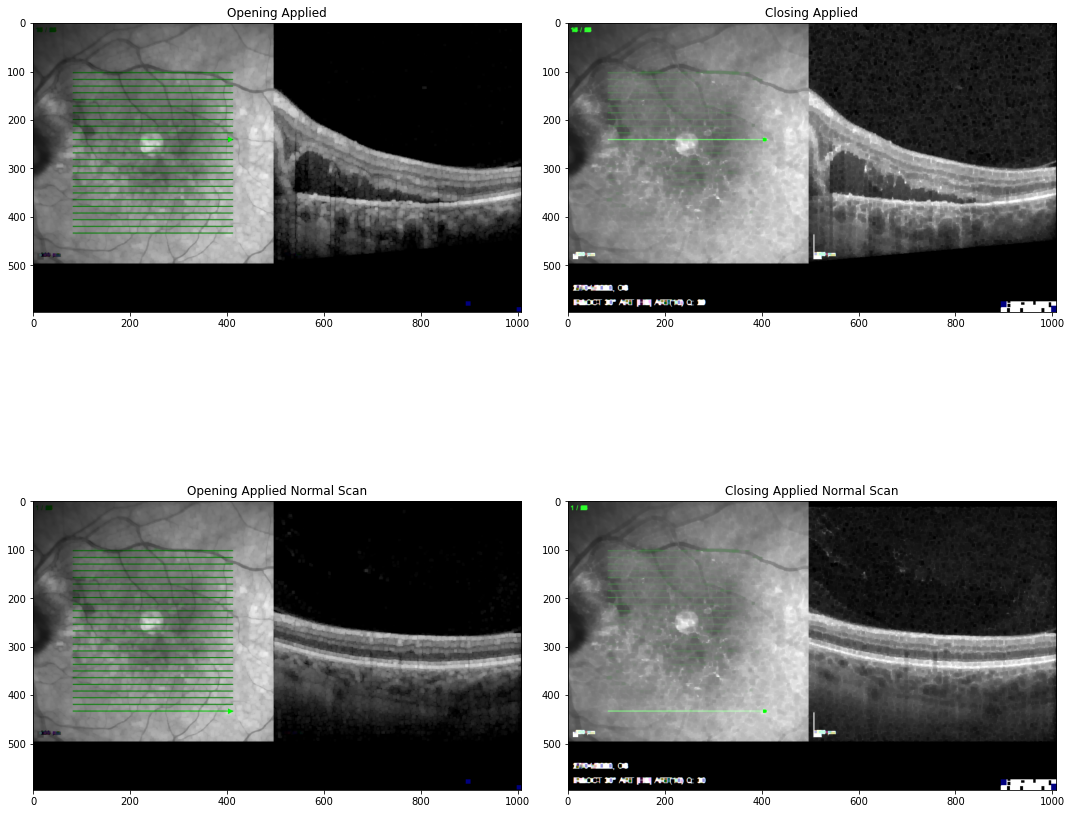

In [ ]:
kernel = np.ones((5,5),np.uint8)

opening = cv.morphologyEx(img_an, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img_an, cv.MORPH_CLOSE, kernel)

opening_n = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing_n = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

fig = plt.figure(figsize=(15, 15))
plt1 = plt.subplot(221)
plt.imshow(opening)

plt2 = plt.subplot(222)
plt.imshow(closing)

plt3 = plt.subplot(223)
plt.imshow(opening_n)

plt4 = plt.subplot(224)
plt.imshow(closing_n)

plt1.title.set_text('Opening Applied')
plt2.title.set_text('Closing Applied')

plt3.title.set_text('Opening Applied Normal Scan')
plt4.title.set_text('Closing Applied Normal Scan')

plt.tight_layout()
plt.show

### Opening is looking like a good way to denoise

## Top-Hat and Black-Hat Transformation

<function matplotlib.pyplot.show>

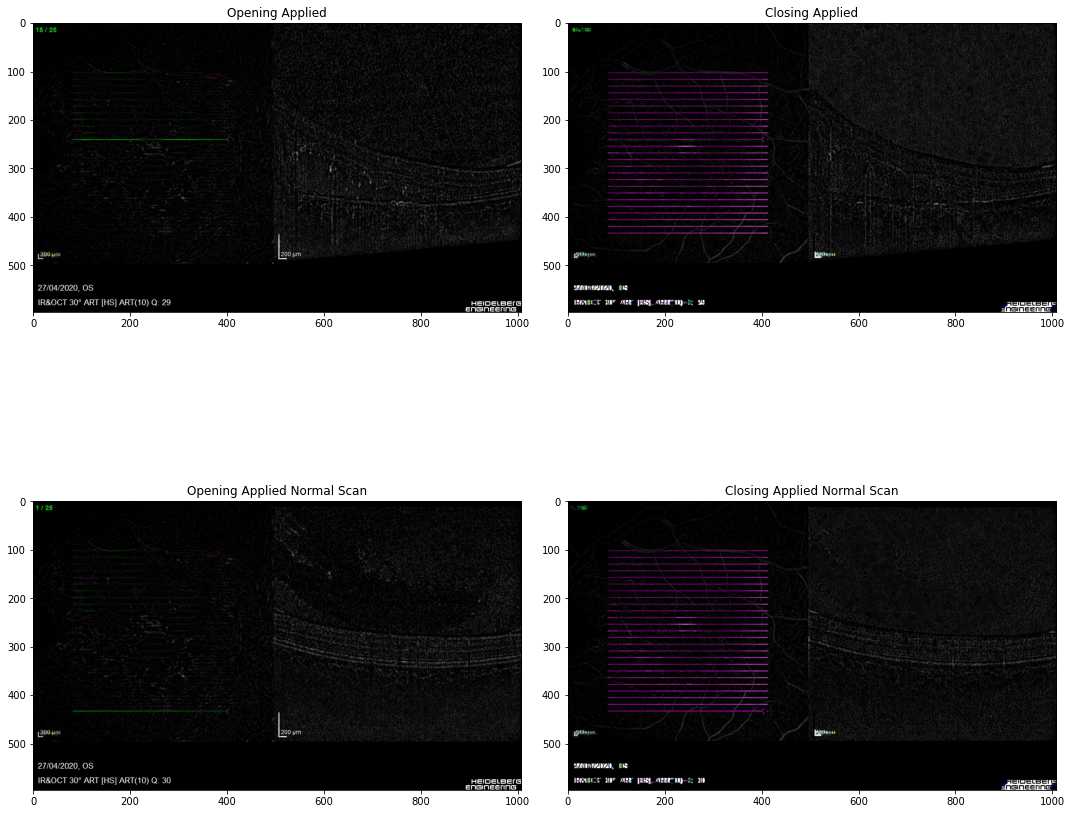

In [31]:
#kernel = np.ones((7,7),np.uint8)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
top_hat = cv.morphologyEx(img_an, cv.MORPH_TOPHAT, kernel) #scan_diff(img_an, opening) 
bot_hat = cv.morphologyEx(img_an, cv.MORPH_BLACKHAT, kernel) #scan_diff(closing, img_an) 

top_hat_n = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel) #scan_diff(img, opening_n)
bot_hat_n = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel) #scan_diff(closing_n, img)

fig = plt.figure(figsize=(15, 15))
plt1 = plt.subplot(221)
plt.imshow(top_hat)

plt2 = plt.subplot(222)
plt.imshow(bot_hat)

plt3 = plt.subplot(223)
plt.imshow(top_hat_n)

plt4 = plt.subplot(224)
plt.imshow(bot_hat_n)

plt1.title.set_text('Opening Applied')
plt2.title.set_text('Closing Applied')

plt3.title.set_text('Opening Applied Normal Scan')
plt4.title.set_text('Closing Applied Normal Scan')

plt.tight_layout()
plt.show

## Canny Edge Detection on Scans

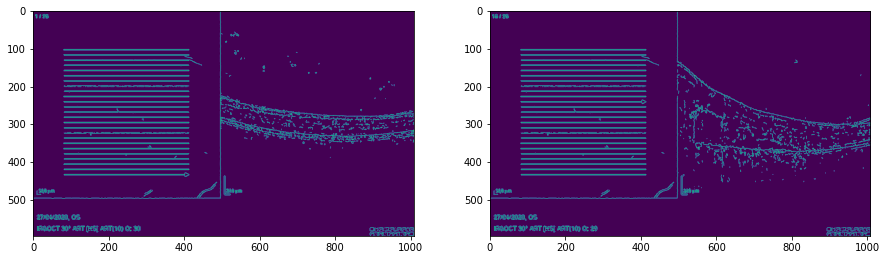

In [30]:
threshold1 = 200
threshold2 = 300

edges_n = cv.Canny(img,threshold1,threshold2)
edges_an = cv.Canny(img_an,threshold1,threshold2)

fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(edges_n)

plt.subplot(122)
plt.imshow(edges_an)



This idea can be extended by fixing a benchmark normal Scan and taking its difference to every new incoming images to see what is happening 

In [ ]:
(ret1_an, binary1_an) = return_binary(img_an)
(ret_dn_an, binary_dn_an) = return_binary(oneimage_an)
cv.imwrite("binary_an.png",binary1_an)
cv.imwrite("binary_dn_an.png",binary_dn_an)

True

## Segmentation

In [64]:
def segment_img(original):
  original = original[10:560,500:,:]
  gray_im = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
  gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
  gray_equ = cv.equalizeHist(gray_im)

  thresh = cv.adaptiveThreshold(gray_correct, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 255, 19)
  thresh = cv.bitwise_not(thresh)
  #plt.subplot(221)

  kernel = np.ones((7,7), np.uint8)
  img_dilation = cv.dilate(thresh, kernel, iterations=1)
  img_erode = cv.erode(img_dilation,kernel, iterations=1)
  # clean all noise after dilatation and erosion
  img_erode = cv.medianBlur(img_erode, 7)

  #fig = plt.figure(figsize=(15, 15))
  #plt.subplot(221)
  #plt.title('Dilatation + erosion')
  #plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)

  ret, labels = cv.connectedComponents(img_erode)
  label_hue = np.uint8(179 * labels / np.max(labels))
  blank_ch = 255 * np.ones_like(label_hue)
  labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
  labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
  labeled_img[label_hue == 0] = 0

  return labeled_img, label_hue
  #plt.subplot(222)
  #plt.title('Objects counted:'+ str(ret-1))
  #plt.imshow(labeled_img)
  #print('objects number is:', ret-1)
  #plt.show()

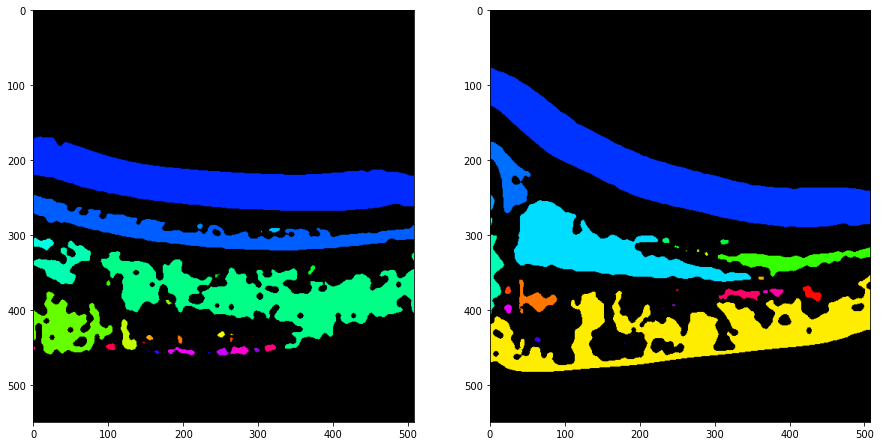

In [65]:
seg_normal, n_hue = segment_img(img)
seg_abnormal, an_hue = segment_img(img_an)
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(seg_normal)

plt.subplot(122)
plt.imshow(seg_abnormal)

## Applying Binary Threshold

In [86]:
def apply_threshold(image_to_apply):
  TH, VAL = 120, 255
  gray = cv.cvtColor(image_to_apply, cv.COLOR_BGR2GRAY)
  blurred = cv.GaussianBlur(gray, (11, 11), 0)
  bin_image = cv.threshold(blurred, TH, VAL, cv.THRESH_BINARY)[1]
  eroded = cv.erode(bin_image, None, iterations = 2)
  dilated = cv.dilate(eroded, None, iterations = 1)
  return bin_image, eroded, dilated

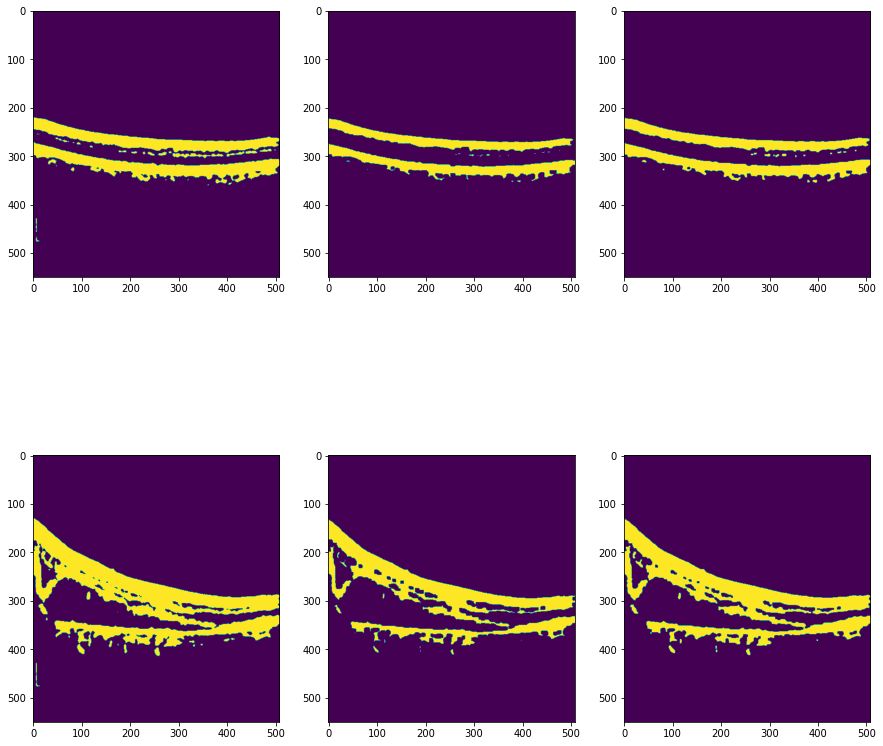

In [87]:
th_normal, n_eroded, n_dilated = apply_threshold(img[10:560,500:,:])
th_abnormal, an_eroded, an_dilated = apply_threshold(img_an[10:560,500:,:])
fig = plt.figure(figsize=(15, 15))
plt.subplot(231)
plt.imshow(th_normal)

plt.subplot(232)
plt.imshow(n_eroded)

plt.subplot(233)
plt.imshow(n_dilated)

plt.subplot(234)
plt.imshow(th_abnormal)

plt.subplot(235)
plt.imshow(an_eroded)

plt.subplot(236)
plt.imshow(an_dilated)

In [113]:
white_normal, white_abnormal = [], []
for x in range(th_normal.shape[0]):
  for y in range(th_normal.shape[1]):
    if th_normal[x,y] == 255:
      white_normal.append(x)

for x in range(th_abnormal.shape[0]):
  for y in range(th_abnormal.shape[1]):
    if th_abnormal[x,y] == 255:
      white_abnormal.append(x)
#print(white_normal)

In [129]:
import seaborn as sns
#f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
#plt.figure(figsize=(15, 15))
#plt.xticks(rotation=45)
#sns.kdeplot(white_normal, ax=axes[0]);
#sns.kdeplot(white_abnormal, ax=axes[1]);


178 333


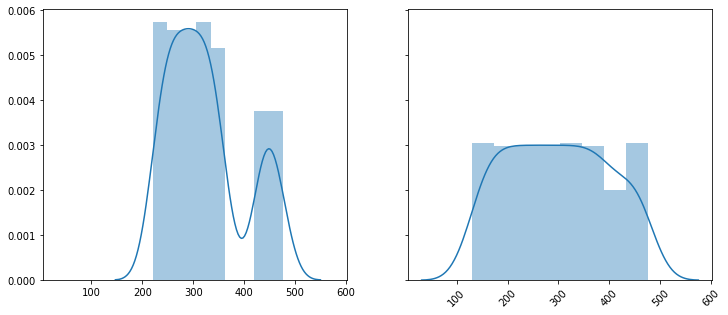

In [130]:
white_normal = list(set(white_normal)) ## getting the unique values only to see the range
white_abnormal = list(set(white_abnormal))

print(len(white_normal), len(white_abnormal))

f, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,5))
#plt.figure(figsize=(15, 15))
plt.xticks(rotation=45)
sns.distplot(white_normal, ax=axes[0]);
sns.distplot(white_abnormal, ax=axes[1]);

#plt.hist(th_abnormal.ravel(),256,[0,256]); plt.show()

#hist_normal = cv.calcHist([th_normal],[0],None,[256],[0,256])
#hist_abnormal = cv.calcHist([th_abnormal],[0],None,[256],[0,256])

#plt.subplot(121), plt.plot(hist_normal)
#plt.subplot(122), plt.plot(hist_abnormal)


In abnormal scan, the bright values are starting earlier than the normal ones.

## Denoising the Normal Scan and Detecting Retinal Layers

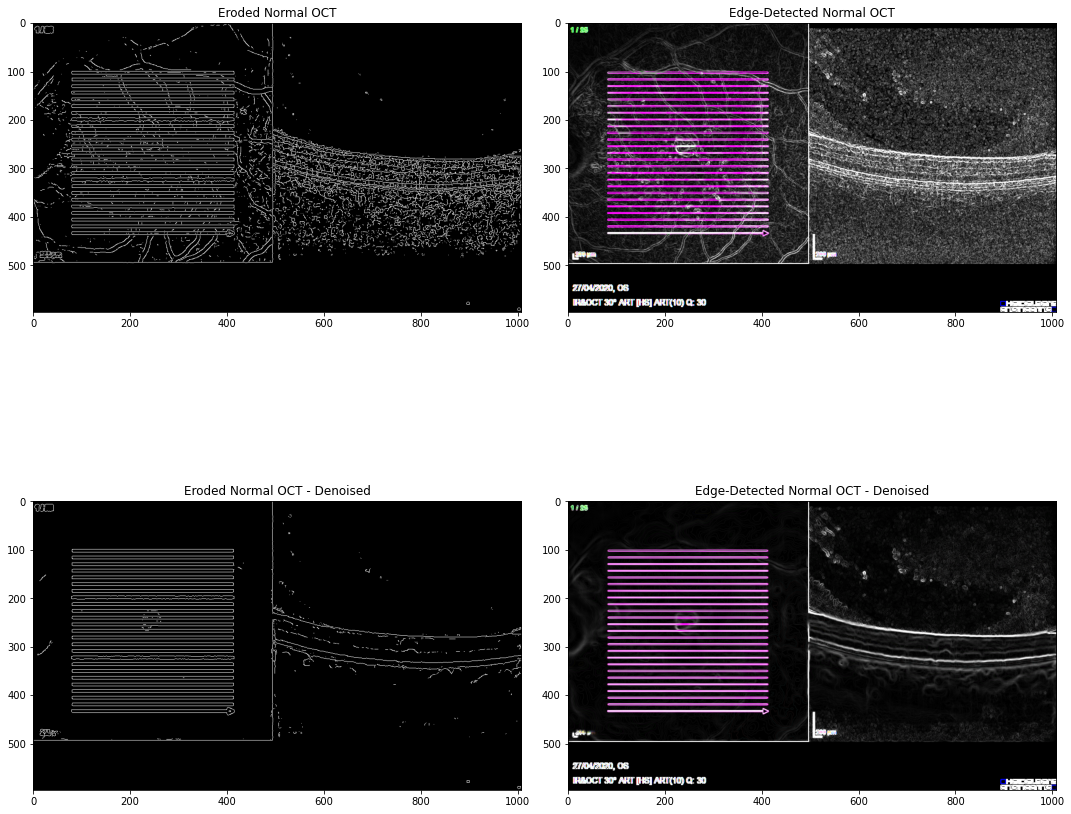

In [ ]:
fig = plt.figure(figsize=(15, 15))
bin = cv.imread('/content/binary.png')
ax1 = fig.add_subplot(2, 2, 1)
plt.imshow(bin)
mag = cv.imread('/content/magnitude.png')
ax2 = fig.add_subplot(2, 2, 2)
plt.imshow(mag)
bin_dn = cv.imread('/content/binary_dn.png')
ax3 = fig.add_subplot(2, 2, 3)
plt.imshow(bin_dn)
mag_dn = cv.imread('/content/magnitude_dn.png')
ax4 = fig.add_subplot(2, 2, 4)
plt.imshow(mag_dn)
ax1.title.set_text('Eroded Normal OCT')
ax2.title.set_text('Edge-Detected Normal OCT')
ax3.title.set_text('Eroded Normal OCT - Denoised')
ax4.title.set_text('Edge-Detected Normal OCT - Denoised')
plt.tight_layout()
plt.show()


## Denoising the Abnormal Scan and Applying Watershed Algorithm on Denoised Scan

In [ ]:
def apply_waterShed(img):
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
  #thresh = img
  # noise removal
  kernel = np.ones((2,2),np.uint8)
  #opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
  closing = cv.morphologyEx(thresh,cv.MORPH_CLOSE,kernel, iterations = 2)

  # sure background area
  sure_bg = cv.dilate(closing,kernel,iterations=1)

  # Finding sure foreground area
  dist_transform = cv.distanceTransform(sure_bg,cv.DIST_L2,3)

  # Threshold
  ret, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)

  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv.subtract(sure_bg,sure_fg)

  # Marker labelling
  ret, markers = cv.connectedComponents(sure_fg)

  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1

  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0

  markers = cv.watershed(img,markers)
  img[markers == -1] = [255,0,0]

  return img


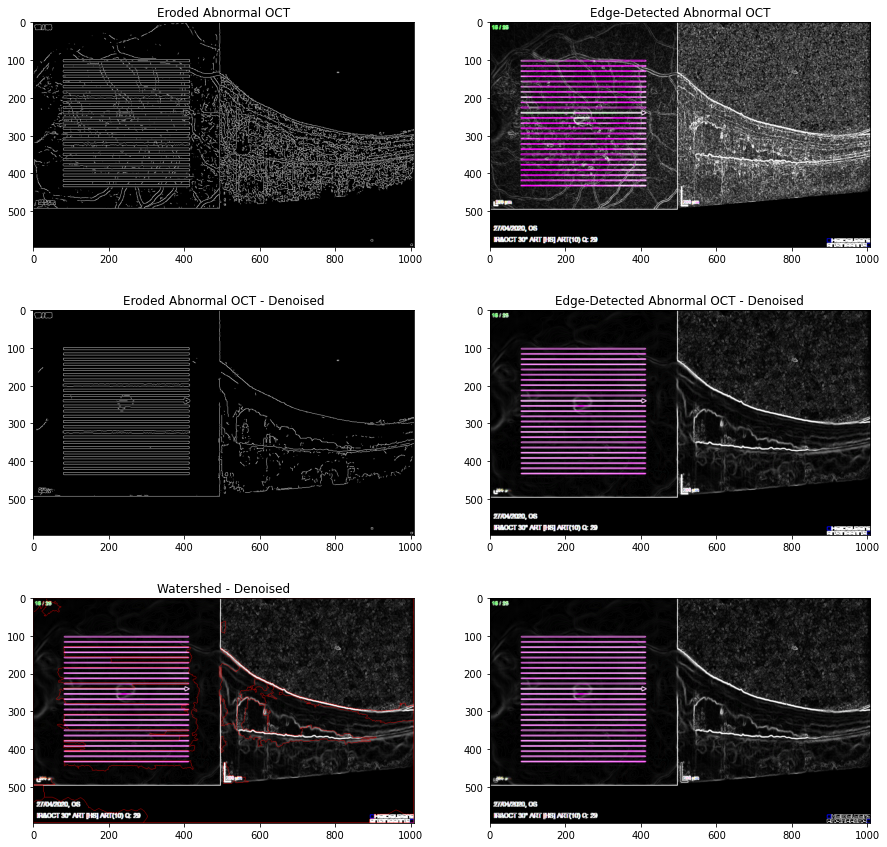

In [ ]:
import matplotlib.image as mpimg

denoised_img = cv.imread('/content/magnitude_dn_an.png')
#denoised_img = cv.fastNlMeansDenoisingColored(denoised_img, None, FILTER_INTENSITY,10,7,21)
watershed_dn = apply_waterShed(denoised_img)

fig = plt.figure(figsize=(15, 15))
bin_an = cv.imread('/content/binary_an.png')
ax5 = fig.add_subplot(3, 2, 1)
plt.imshow(bin_an)
mag_an = cv.imread('/content/magnitude_an.png')
ax6 = fig.add_subplot(3, 2, 2)
plt.imshow(mag_an)
bin_dn_an = cv.imread('/content/binary_dn_an.png')
ax7 = fig.add_subplot(3, 2, 3)
plt.imshow(bin_dn_an)
mag_dn_an = cv.imread('/content/magnitude_dn_an.png')
ax8 = fig.add_subplot(3, 2, 4)
plt.imshow(mag_dn_an)
ax9 = fig.add_subplot(3, 2, 5)
plt.imshow(watershed_dn)
ax11 = fig.add_subplot(3, 2, 6)
plt.imshow(scan_diff(mag_dn, mag_dn_an))

ax5.title.set_text('Eroded Abnormal OCT')
ax6.title.set_text('Edge-Detected Abnormal OCT')
ax7.title.set_text('Eroded Abnormal OCT - Denoised')
ax8.title.set_text('Edge-Detected Abnormal OCT - Denoised')
ax9.title.set_text('Watershed - Denoised')

plt.show()